In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import sklearn.preprocessing as preprocessing
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

In [2]:
data = pd.read_csv('Bank.csv')
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    print(corr)
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
    plt.yticks(range(len(corr.columns)), corr.columns);


In [4]:
data['y'] = data['y'].map({'no':0,'yes':1})

In [5]:
data_numeric = data.drop(columns=['job', 'marital', 'education','default','housing','loan','contact','month','day_of_week','poutcome'])
data_numeric.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


In [6]:
data_category = data.loc[:,['job', 'marital', 'education','default','housing','loan','contact','month','day_of_week','poutcome']]
data_category.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [7]:
data_numeric.shape

(41188, 11)

In [8]:
data_category.shape

(41188, 10)

In [9]:
data_dummies = pd.get_dummies(data_category, columns=['job', 'marital', 'education','default','housing','loan','contact','month','day_of_week','poutcome'])
data_dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


                               job_admin.  job_blue-collar  job_entrepreneur  \
job_admin.                       1.000000        -0.313313         -0.111417   
job_blue-collar                 -0.313313         1.000000         -0.103050   
job_entrepreneur                -0.111417        -0.103050          1.000000   
job_housemaid                   -0.094595        -0.087492         -0.031113   
job_management                  -0.160892        -0.148810         -0.052918   
job_retired                     -0.121502        -0.112378         -0.039962   
job_self-employed               -0.110021        -0.101759         -0.036186   
job_services                    -0.190063        -0.175791         -0.062513   
job_student                     -0.085748        -0.079308         -0.028203   
job_technician                  -0.257516        -0.238178         -0.084698   
job_unemployed                  -0.092467        -0.085523         -0.030413   
job_unknown                     -0.05230

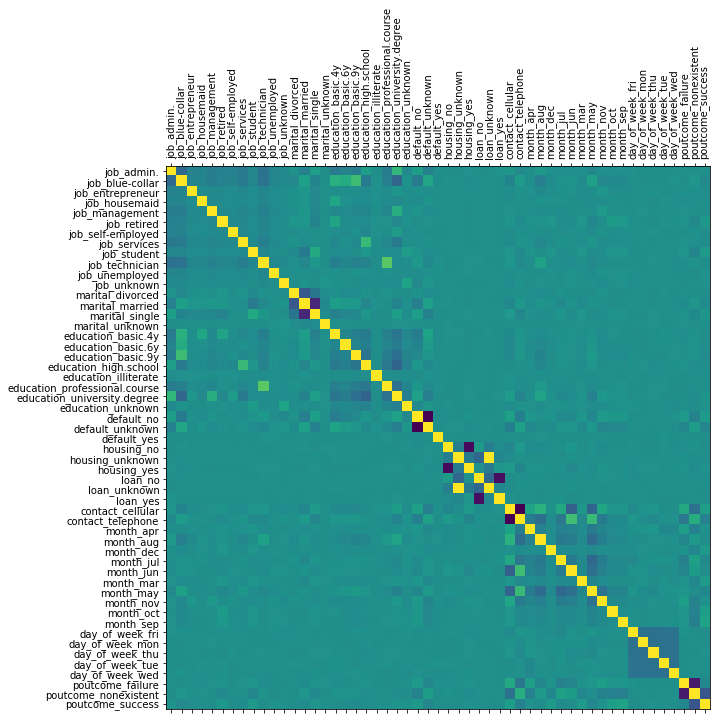

In [23]:
plot_corr(data_dummies)

In [10]:
print(data.isnull().mean())

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64


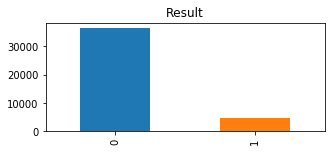

In [11]:
data.y.value_counts().plot.bar(title="Result",figsize=(5,2))

In [12]:
data.shape

(41188, 21)

In [13]:
data_total = pd.concat((data_numeric,data_dummies), axis=1)
data_x = data_total.drop(columns=['y'])
data_y = data.y

In [14]:
data_x.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [15]:
data_y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y,
                                                  test_size=0.3,
                                                  shuffle=True,
                                                  random_state=123456)

In [17]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.086420,0.087027,0.036364,1.0,0.0,0.333333,0.269680,0.192469,0.143278,0.512287,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.160494,0.028874,0.000000,1.0,0.0,1.000000,0.484412,0.615063,0.981637,1.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.320988,0.349736,0.000000,1.0,0.0,0.354167,0.722525,0.460251,0.021537,0.105860,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.259259,0.187475,0.018182,1.0,0.0,1.000000,0.882307,0.376569,0.980957,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.197531,0.076251,0.000000,1.0,0.0,0.333333,0.269680,0.192469,0.157107,0.512287,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [18]:
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)
X_test_scaled.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.263889,0.018576,0.02439,1.0,0.0,0.333333,0.340608,0.154812,0.173469,0.512287,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.194444,0.169564,0.00000,1.0,0.0,0.333333,0.269680,0.192469,0.150567,0.512287,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.152778,0.049059,0.02439,1.0,0.0,1.000000,0.669135,0.338912,0.980952,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.208333,0.022386,0.00000,1.0,0.0,1.000000,0.882307,0.376569,0.958957,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.152778,0.035246,0.02439,1.0,0.0,0.937500,0.698753,0.602510,0.957823,0.859735,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
sm_bl = SMOTE(k_neighbors = 5, m_neighbors = 2, kind = 'borderline1')
X_resampled, y_resampled = sm_bl.fit_sample(X_train_scaled, y_train)b

Text(0.5, 1.0, 'Resample Data (0.500)')

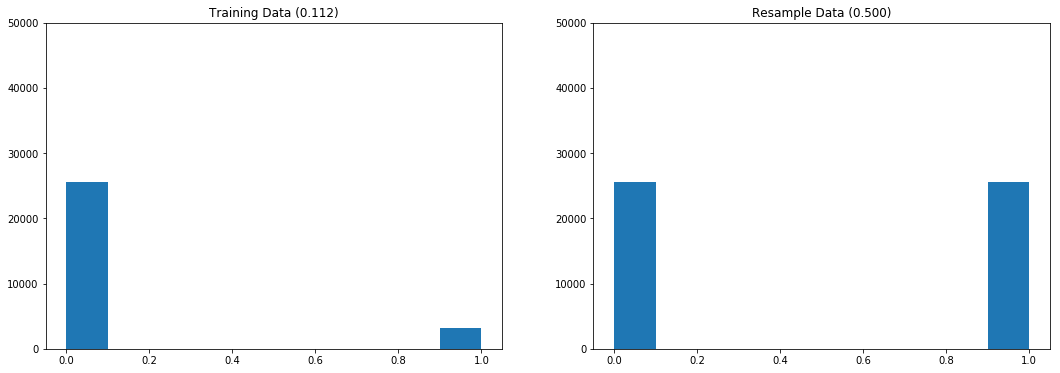

In [20]:
plt.figure(figsize=(18, 6))
plt.subplot(121)
plt.hist(y_train)
plt.ylim(0, 50000)
plt.title('Training Data ({:.3f})'.format(np.mean(y_train)))
plt.subplot(122)
plt.hist(y_resampled)
plt.ylim(0, 50000)
plt.title('Resample Data ({:.3f})'.format(np.mean(y_resampled)))

In [26]:
model = RandomForestClassifier(n_estimators=200, max_depth=22, random_state=111,criterion='gini',max_features='log2').fit(X_resampled, y_resampled)
y_pred = model.predict(X_test_scaled)
LR_cm = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy_score(y_test, y_pred),      
      '\nPrecision:', precision_score(y_test, y_pred), 
      '\nRecall:', recall_score(y_test, y_pred),
      '\nF1_score:', f1_score(y_test, y_pred))

Accuracy: 0.9021607186210245 
Precision: 0.5624619134673979 
Recall: 0.6527581329561527 
F1_score: 0.6042553191489362


In [22]:
imp = model.feature_importances_
imp = pd.DataFrame([data_x.columns, imp]).T
imp.columns = ['variables', 'importance']
sorted_idx = np.argsort(imp['importance'])[::-1]
imp = imp.iloc[sorted_idx,:]
print(imp[imp['importance'] > 0.01])

               variables importance
1               duration   0.262916
8              euribor3m   0.136868
9            nr.employed   0.104168
5           emp.var.rate  0.0530446
6         cons.price.idx  0.0377846
7          cons.conf.idx  0.0348145
2               campaign  0.0338834
0                    age  0.0310311
44     contact_telephone  0.0222116
3                  pdays   0.017681
51             month_may  0.0175604
61  poutcome_nonexistent  0.0123616
62      poutcome_success  0.0107286


In [ ]:
model

In [24]:
import time
import os
import random

In [25]:
#개 오래걸림...
np.random.seed(0)
start = time.time()

param_dict = {"max_depth": [10,20,22],
             "max_features" : ["auto","sqrt","log2"],
             "criterion": ["gini","entropy"],
             "n_estimators":[100,200]
             }

cv_rf = GridSearchCV( model, cv=5,scoring="f1",
                    param_grid=param_dict,
                    n_jobs = 3)

cv_rf.fit(X_resampled, y_resampled)

print('Best Parameters using grid search: \n',
     cv_rf.best_params_)
print('Best estimator using grid search: \n',
     cv_rf.best_estimator_)
print('Best Parameters using grid search: \n',
     cv_rf.best_score_)
end = time.time()
print('Time taken in grid search: {:.2f}'.format(end-start))

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 22, 'max_features': 'log2', 'n_estimators': 200}
Best estimator using grid search: 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=22, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=111,
                       verbose=0, warm_start=False)
Best Parameters using grid search: 
 0.9470481481683374
Time taken in grid search: 1066.70
